# Segmenting and Clustering Neighborhoods in Toronto

In [1]:
!pip install bs4
from bs4 import BeautifulSoup # this module helps in web scrapping.
!pip install requests
import requests  # this module helps us to download a web page
import pandas as pd

     |████████████████████████████████| 122kB 6.6MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


In [2]:
url = 'https://en.wikipedia.org/wiki/Wellington_Region'

In [3]:
data = requests.get(url).text

In [4]:
soup = BeautifulSoup(data, 'html5lib')
table_contents=[]
table=soup.findAll('table')
#print(soup)
table = table[5]
table

<table class="wikitable">
<tbody><tr>
<th>Urban area
</th>
<th>Population<br/><small>(June 2020)<sup class="reference" id="cite_ref-NZ_population_data_2018_1-3"><a href="#cite_note-NZ_population_data_2018-1">[1]</a></sup></small>
</th>
<th>% of region
</th></tr>
<tr>
<td>Wellington
</td>
<td style="text-align:right;">215,100
</td>
<td style="text-align:right;">39.7%
</td></tr>
<tr>
<td>Lower Hutt
</td>
<td style="text-align:right;">110,700
</td>
<td style="text-align:right;">20.4%
</td></tr>
<tr>
<td>Porirua
</td>
<td style="text-align:right;">59,600
</td>
<td style="text-align:right;">11.0%
</td></tr>
<tr>
<td>Upper Hutt
</td>
<td style="text-align:right;">44,300
</td>
<td style="text-align:right;">8.2%
</td></tr>
<tr>
<td>Paraparaumu
</td>
<td style="text-align:right;">30,100
</td>
<td style="text-align:right;">5.6%
</td></tr>
<tr>
<td>Masterton
</td>
<td style="text-align:right;">21,400
</td>
<td style="text-align:right;">3.9%
</td></tr>
<tr>
<td>Waikanae
</td>
<td style="text-align

In [251]:
counter = 0
table_contents = []
cell = {}

for row in table.findAll('td'):
    if(row.text[3:4] == "%" or row.text[4:5] == "%"):
        pass
    elif(counter % 2):
        cell['Population'] = (row.text).strip('\n')
        table_contents.append(cell)
        cell = {}
        counter = counter + 1
    else:
        cell['Town'] = (row.text).strip('\n')
        counter = counter + 1

print(table_contents)
df = pd.DataFrame(table_contents)

df

[{'Town': 'Wellington', 'Population': '215,100'}, {'Town': 'Lower Hutt', 'Population': '110,700'}, {'Town': 'Porirua', 'Population': '59,600'}, {'Town': 'Upper Hutt', 'Population': '44,300'}, {'Town': 'Paraparaumu', 'Population': '30,100'}, {'Town': 'Masterton', 'Population': '21,400'}, {'Town': 'Waikanae', 'Population': '13,650'}, {'Town': 'Carterton', 'Population': '5,800'}, {'Town': 'Ōtaki', 'Population': '4,980'}, {'Town': 'Featherston', 'Population': '2,680'}, {'Town': 'Greytown', 'Population': '2,690'}, {'Town': 'Ōtaki Beach', 'Population': '2,040'}, {'Town': 'Martinborough', 'Population': '1,930'}, {'Town': 'Paekākāriki', 'Population': '1,840'}]


,Town,Population
0,Wellington,"215,100"
1,Lower Hutt,"110,700"
2,Porirua,"59,600"
3,Upper Hutt,"44,300"
4,Paraparaumu,"30,100"
5,Masterton,"21,400"
6,Waikanae,"13,650"
7,Carterton,"5,800"
8,Ōtaki,"4,980"
9,Featherston,"2,680"


In [252]:
df_data_1 = pd.read_csv("Greater_Wellington_Region_Basemap.csv")
lat_long = pd.DataFrame(df_data_1)
lat_long.head()

,OBJECTID,Point_desc,Latitude,Longitude,POINT_NAME,X,Y
0,1,TOWN,-40.96,175.66,Masterton,1.824493e+06,5.461784e+06
1,2,USAT,-41.08,174.85,Plimmerton,1.755874e+06,5.450773e+06
2,3,USAT,-40.98,174.94,Paekakariki,1.763567e+06,5.461345e+06
3,4,USAT,-40.93,174.96,Raumati South,1.765406e+06,5.466496e+06
4,5,USAT,-40.91,174.96,Raumati Beach,1.765661e+06,5.468600e+06


In [253]:
#Cleaning coords df
lat_long.drop(lat_long.columns[[0, 1, 5, 6]], axis=1, inplace=True)
lat_long.rename(columns={'POINT_NAME': 'Town'}, inplace = True)

#Adding Wellington City
df_coords = lat_long.append({'Town': 'Wellington', 'Latitude': -41.2924, 'Longitude': 174.7787}, ignore_index=True)

#Merging the df's together
ls_towns = pd.merge(df, df_coords, on='Town')
ls_towns

,Town,Population,Latitude,Longitude
0,Wellington,"215,100",-41.2924,174.7787
1,Lower Hutt,"110,700",-41.2100,174.9300
2,Porirua,"59,600",-41.1400,174.8100
3,Upper Hutt,"44,300",-41.1400,175.0500
4,Paraparaumu,"30,100",-40.9100,174.9800
5,Masterton,"21,400",-40.9600,175.6600
6,Waikanae,"13,650",-40.8600,175.0500
7,Carterton,"5,800",-41.0200,175.5300
8,Featherston,"2,680",-41.1100,175.3200
9,Greytown,"2,690",-41.0800,175.4600


In [254]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

address = 'Featherston , New Zealand'

geolocator = Nominatim(user_agent="Featherston_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Featherston City are {}, {}.'.format(latitude, longitude))

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.
The geograpical coordinate of Featherston City are -41.114939, 175.32524.


In [255]:
# create map of New York using latitude and longitude values
map_Featherston = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, town, population in zip(ls_towns['Latitude'], ls_towns['Longitude'], ls_towns['Town'], ls_towns['Population']):
    label = '{}: {}'.format(town, population + ' Population')
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Featherston)
    
map_Featherston

In [256]:
print('The dataframe has {} towns'.format(
        len(ls_towns['Town'].unique())
    )
)

The dataframe has 11 towns


In [257]:
CLIENT_ID = '####' # your Foursquare ID
CLIENT_SECRET = '####' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 50 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ####
CLIENT_SECRET:####


In [258]:
ls_towns.loc[0, 'Town']

'Wellington'

In [259]:
def getNearbyBusinesses(towns, latitudes, longitudes, radius=6000):
    
    businesses_list=[]
    for town, lat, lng in zip(towns, latitudes, longitudes):
        print(town)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        businesses_list.append([(
            town, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for business_list in businesses_list for item in business_list])
    nearby_venues.columns = ['Town', 
                  'Town Latitude', 
                  'Town Longitude', 
                  'Business', 
                  'Business Latitude', 
                  'Business Longitude', 
                  'Business Category']
    
    return(nearby_venues)

In [260]:
town_businesses = getNearbyBusinesses(towns=ls_towns['Town'],
                                   latitudes=ls_towns['Latitude'],
                                   longitudes=ls_towns['Longitude']
                                  )

Wellington
Lower Hutt
Porirua
Upper Hutt
Paraparaumu
Masterton
Waikanae
Carterton
Featherston
Greytown
Martinborough


In [261]:
print(town_businesses.shape)
town_businesses.head()

(243, 7)


,Town,Town Latitude,Town Longitude,Business,Business Latitude,Business Longitude,Business Category
0,Wellington,-41.2924,174.7787,Golding's Free Dive,-41.292689,174.777103,Dive Bar
1,Wellington,-41.2924,174.7787,Choice Bros Ghuznee Street,-41.292744,174.775245,Brewery
2,Wellington,-41.2924,174.7787,Hashigo Zake,-41.291585,174.779341,Bar
3,Wellington,-41.2924,174.7787,Lamason,-41.289843,174.776001,Coffee Shop
4,Wellington,-41.2924,174.7787,Museum of New Zealand Te Papa Tongarewa,-41.290296,174.782053,Museum


In [262]:
town_businesses.groupby('Town').count()

,Town Latitude,Town Longitude,Business,Business Latitude,Business Longitude,Business Category
Town,,,,,,
Carterton,5,5,5,5,5,5
Featherston,6,6,6,6,6,6
Greytown,9,9,9,9,9,9
Lower Hutt,50,50,50,50,50,50
Martinborough,21,21,21,21,21,21
Masterton,15,15,15,15,15,15
Paraparaumu,17,17,17,17,17,17
Porirua,33,33,33,33,33,33
Upper Hutt,22,22,22,22,22,22


In [263]:
print('There are {} uniques categories.'.format(len(town_businesses['Business Category'].unique())))

There are 85 uniques categories.


In [264]:
#Data cleaning for visualization
town_businesses_total = town_businesses.groupby('Town').count()
town_businesses_total = town_businesses_total.reset_index(drop=False)
town_businesses_total = town_businesses_total.drop(town_businesses_total.iloc[:, 1:6].columns, axis = 1)
town_businesses_total.rename(columns={'Business Category': 'Business_Category_Total'}, inplace=True)
town_businesses_total = town_businesses_total.sort_values(by='Business_Category_Total', ascending=True)
ls_towns_pop = ls_towns
ls_towns_pop['Population'] = ls_towns_pop['Population'].str.replace(',', '')
ls_towns_pop['Population'] = ls_towns_pop['Population'].astype({'Population': 'int64'})
ls_towns_pop = ls_towns_pop.sort_values(by='Population', ascending=True)
print(ls_towns_pop)
town_businesses_total


             Town  Population  Latitude  Longitude
10  Martinborough        1930  -41.2100   175.4300
8     Featherston        2680  -41.1100   175.3200
9        Greytown        2690  -41.0800   175.4600
7       Carterton        5800  -41.0200   175.5300
6        Waikanae       13650  -40.8600   175.0500
5       Masterton       21400  -40.9600   175.6600
4     Paraparaumu       30100  -40.9100   174.9800
3      Upper Hutt       44300  -41.1400   175.0500
2         Porirua       59600  -41.1400   174.8100
1      Lower Hutt      110700  -41.2100   174.9300
0      Wellington      215100  -41.2924   174.7787


,Town,Business_Category_Total
0,Carterton,5
1,Featherston,6
2,Greytown,9
5,Masterton,15
9,Waikanae,15
6,Paraparaumu,17
4,Martinborough,21
8,Upper Hutt,22
7,Porirua,33
3,Lower Hutt,50


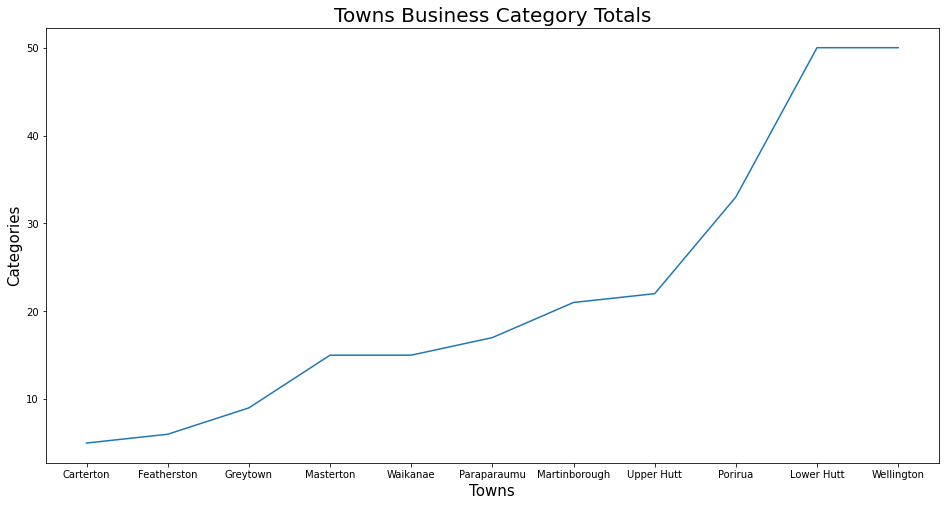

In [265]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

# plotting the line 1 points 
plt.plot(town_businesses_total['Town'], town_businesses_total['Business_Category_Total'], label = "Business Categories")

plt.ylabel('Categories', fontsize=15)
# Set the y axis label of the current axis.
plt.xlabel('Towns', fontsize=15)
# Set a title of the current axes.
plt.title('Towns Business Category Totals', fontsize=20)

# Display a figure.
plt.show()

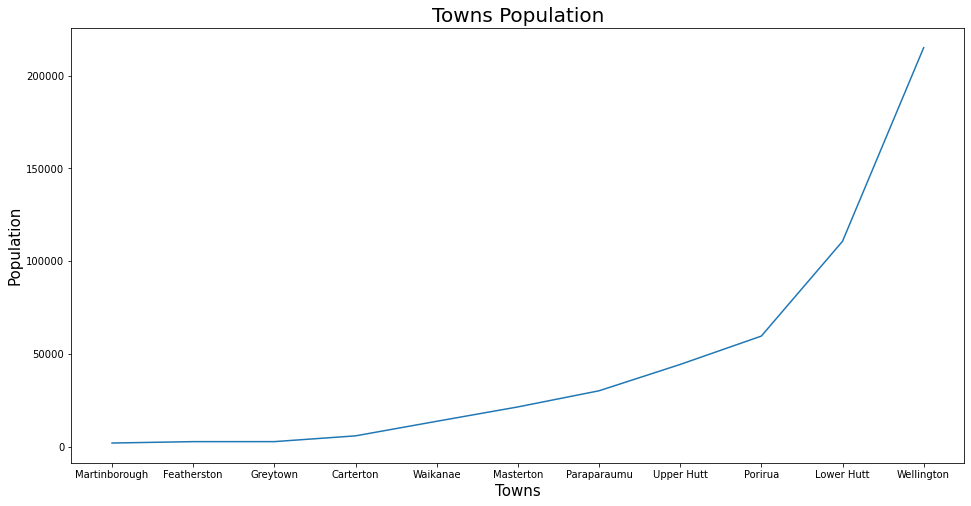

In [266]:
plt.figure(figsize=(16,8))

plt.plot(ls_towns_pop['Town'], ls_towns_pop['Population'], label = "Population")
plt.ylabel('Population', fontsize=15)
# Set the y axis label of the current axis.
plt.xlabel('Towns', fontsize=15)
# Set a title of the current axes.
plt.title('Towns Population', fontsize=20)

# Display a figure.
plt.show()

In [267]:
# one hot encoding
town_onehot = pd.get_dummies(town_businesses[['Business Category']], prefix="", prefix_sep="")

# add town column back to dataframe
town_onehot['Town'] = town_businesses['Town'] 

# move town column to the first column
fixed_columns = [town_onehot.columns[-1]] + list(town_onehot.columns[:-1])
town_onehot = town_onehot[fixed_columns]

town_onehot.head()

,Town,Airport,American Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Beach,Beer Bar,Beer Garden,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Café,Cambodian Restaurant,Candy Store,Cheese Shop,Chinese Restaurant,Coffee Shop,Deli / Bodega,Department Store,Diner,Dive Bar,Electronics Store,Exhibit,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Golf Driving Range,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Jewelry Store,Liquor Store,Lounge,Middle Eastern Restaurant,Modern European Restaurant,Motel,Movie Theater,Museum,Nature Preserve,Paper / Office Supplies Store,Park,Pharmacy,Pizza Place,Pool,Portuguese Restaurant,Pub,Racetrack,Resort,Restaurant,Rugby Pitch,Sandwich Place,Seafood Restaurant,Shopping Mall,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Thai Restaurant,Theater,Train Station,Vineyard,Waterfront,Wine Bar,Wine Shop,Winery
0,Wellington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Wellington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wellington,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Wellington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Wellington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [268]:
town_onehot.shape

(243, 86)

In [269]:
town_grouped = town_onehot.groupby('Town').mean().reset_index()
town_grouped

,Town,Airport,American Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Beach,Beer Bar,Beer Garden,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Café,Cambodian Restaurant,Candy Store,Cheese Shop,Chinese Restaurant,Coffee Shop,Deli / Bodega,Department Store,Diner,Dive Bar,Electronics Store,Exhibit,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Golf Driving Range,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Jewelry Store,Liquor Store,Lounge,Middle Eastern Restaurant,Modern European Restaurant,Motel,Movie Theater,Museum,Nature Preserve,Paper / Office Supplies Store,Park,Pharmacy,Pizza Place,Pool,Portuguese Restaurant,Pub,Racetrack,Resort,Restaurant,Rugby Pitch,Sandwich Place,Seafood Restaurant,Shopping Mall,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Thai Restaurant,Theater,Train Station,Vineyard,Waterfront,Wine Bar,Wine Shop,Winery
0,Carterton,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.200000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.200000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.2,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.200000,0.000000,0.00,0.00,0.000000,0.000000
1,Featherston,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.166667,0.000000,0.000000,0.166667,0.00,0.000000,0.166667,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.333333,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.0,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.166667,0.000000,0.00,0.00,0.000000,0.000000
2,Greytown,0.000000,0.00,0.000000,0.111111,0.00,0.000000,0.000000,0.000000,0.00,0.111111,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.00,0.000000,0.111111,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.111111,0.000000,0.00,0.00,0.000000,0.111111,0.00,0.00,0.00,0.000000,0.0,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.111111,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.111111,0.000000,0.00,0.00,0.000000,0.000000
3,Lower Hutt,0.000000,0.02,0.020000,0.000000,0.02,0.000000,0.000000,0.000000,0.02,0.020000,0.000000,0.020000,0.00,0.02,0.02,0.00,0.000000,0.020000,0.180000,0.000000,0.000000,0.000000,0.00,0.080000,0.020000,0.020000,0.000000,0.00,0.02,0.00,0.020000,0.000000,0.02,0.000000,0.000000,0.000000,0.000000,0.02,0.000000,0.020000,0.020000,0.020000,0.02,0.02,0.000000,0.000000,0.00,0.02,0.02,0.020000,0.0,0.000000,0.00,0.02,0.000000,0.000000,0.000000,0.000000,0.02,0.000000,0.020000,0.000000,0.000000,0.000000,0.02,0.02,0.000000,0.000000,0.000000,0.000000,0.020000,0.00,0.000000,0.02,0.02,0.060000,0.02,0.02,0.000000,0.020000,0.000000,0.00,0.00,0.000000,0.000000
4,Martinborough,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.00,0.000000,0.047619,0.000000,0.047619,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0

In [288]:
town_grouped_Burger_Joint = town_grouped[['Town', 'Burger Joint']]
town_grouped_Burger_Joint

,Town,Burger Joint
0,Carterton,0.000000
1,Featherston,0.000000
2,Greytown,0.000000
3,Lower Hutt,0.020000
4,Martinborough,0.000000
5,Masterton,0.000000
6,Paraparaumu,0.117647
7,Porirua,0.030303
8,Upper Hutt,0.090909
9,Waikanae,0.000000


In [271]:
town_grouped.shape

(11, 86)

In [272]:
num_top_businesses = 5

for town in town_grouped['Town']:
    print("----"+town+"----")
    temp = town_grouped[town_grouped['Town'] == town].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_businesses))
    print('\n')

----Carterton----
           venue  freq
0  Grocery Store   0.2
1  Train Station   0.2
2           Café   0.2
3  Jewelry Store   0.2
4         Bakery   0.2


----Featherston----
           venue  freq
0  Grocery Store  0.33
1    Cheese Shop  0.17
2  Train Station  0.17
3           Café  0.17
4  Deli / Bodega  0.17


----Greytown----
                 venue  freq
0            Hotel Bar  0.11
1        Deli / Bodega  0.11
2  Arts & Crafts Store  0.11
3           Restaurant  0.11
4        Train Station  0.11


----Lower Hutt----
                  venue  freq
0                  Café  0.18
1           Coffee Shop  0.08
2           Supermarket  0.06
3  Gym / Fitness Center  0.02
4          Gourmet Shop  0.02


----Martinborough----
         venue  freq
0       Winery  0.43
1        Hotel  0.14
2         Café  0.14
3  Supermarket  0.05
4       Resort  0.05


----Masterton----
                        venue  freq
0                        Café  0.33
1                 Supermarket  0.20
2           

In [273]:
def return_most_common_business(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [274]:
num_top_businesses = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top businesses
columns = ['Town']
for ind in np.arange(num_top_businesses):
    try:
        columns.append('{}{} Most Common Business'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Business'.format(ind+1))

# create a new dataframe
towns_business_sorted = pd.DataFrame(columns=columns)
towns_business_sorted['Town'] = town_grouped['Town']

for ind in np.arange(town_grouped.shape[0]):
    towns_business_sorted.iloc[ind, 1:] = return_most_common_business(town_grouped.iloc[ind, :], num_top_businesses)

towns_business_sorted

,Town,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
0,Carterton,Bakery,Grocery Store,Café,Train Station,Jewelry Store,Farmers Market,Deli / Bodega,Department Store,Diner,Dive Bar
1,Featherston,Grocery Store,Café,Deli / Bodega,Train Station,Cheese Shop,Farmers Market,Coffee Shop,Department Store,Diner,Dive Bar
2,Greytown,Deli / Bodega,Candy Store,Grocery Store,Arts & Crafts Store,Train Station,Café,Hotel Bar,Bakery,Restaurant,Exhibit
3,Lower Hutt,Café,Coffee Shop,Supermarket,Gym / Fitness Center,Deli / Bodega,Bowling Alley,Burger Joint,Middle Eastern Restaurant,Italian Restaurant,Indie Movie Theater
4,Martinborough,Winery,Hotel,Café,Vineyard,Wine Shop,Deli / Bodega,Supermarket,Diner,Resort,Farmers Market
5,Masterton,Café,Supermarket,Airport,Food & Drink Shop,Modern European Restaurant,Farmers Market,Bakery,Garden Center,Hotel,Furniture / Home Store
6,Paraparaumu,Café,Grocery Store,Restaurant,Burger Joint,Beach,Museum,Supermarket,Diner,Italian Restaurant,Bar
7,Porirua,Café,Supermarket,Park,Grocery Store,Train Station,Fast Food Restaurant,Department Store,Pizza Place,Furniture / Home Store,Gym
8,Upper Hutt,Café,Fast Food Restaurant,Burger Joint,Supermarket,Park,Train Station,Motel,Golf Driving Range,Pizza Place,Pool
9,Waikanae,Café,Grocery Store,Beach,Cambodian Restaurant,BBQ Joint,Museum,Brewery,Bakery,Gourmet Shop,Train Station


In [275]:
# set number of clusters
kclusters = 3

Town_grouped_clustering = town_grouped.drop('Town', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Town_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:15]

array([1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0], dtype=int32)

In [310]:
# set number of clusters
kclusters1 = 3

Town_grouped_clustering_1 = town_grouped_Burger_Joint.drop('Town', 1)

# run k-means clustering
kmeans1 = KMeans(n_clusters=kclusters1, random_state=0).fit(Town_grouped_clustering_1)

# check cluster labels generated for each row in the dataframe
kmeans1.labels_[0:15]

array([0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2], dtype=int32)

In [311]:
# add clustering labels
towns_business_sorted.drop('Cluster Labels', axis=1, inplace = True)
towns_business_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

town_merged = ls_towns

# merge scarborough_grouped with scarborough_data to add latitude/longitude for each neighborhood
town_merged = town_merged.join(towns_business_sorted.set_index('Town'), on='Town')
town_merged = town_merged[town_merged['Cluster Labels'].notna()]
town_merged['Cluster Labels'].astype(int)
town_merged.head() # check the last columns!

,Town,Population,Latitude,Longitude,Cluster Labels,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
0,Wellington,215100,-41.2924,174.7787,0,Café,Restaurant,Bar,Coffee Shop,Burger Joint,Asian Restaurant,Pizza Place,Brewery,Ice Cream Shop,Dive Bar
1,Lower Hutt,110700,-41.2100,174.9300,0,Café,Coffee Shop,Supermarket,Gym / Fitness Center,Deli / Bodega,Bowling Alley,Burger Joint,Middle Eastern Restaurant,Italian Restaurant,Indie Movie Theater
2,Porirua,59600,-41.1400,174.8100,0,Café,Supermarket,Park,Grocery Store,Train Station,Fast Food Restaurant,Department Store,Pizza Place,Furniture / Home Store,Gym
3,Upper Hutt,44300,-41.1400,175.0500,0,Café,Fast Food Restaurant,Burger Joint,Supermarket,Park,Train Station,Motel,Golf Driving Range,Pizza Place,Pool
4,Paraparaumu,30100,-40.9100,174.9800,0,Café,Grocery Store,Restaurant,Burger Joint,Beach,Museum,Supermarket,Diner,Italian Restaurant,Bar


In [312]:
# add clustering labels
towns_business_sorted_1 = towns_business_sorted
towns_business_sorted_1.drop('Cluster Labels', axis=1, inplace = True)
towns_business_sorted_1.insert(0, 'Cluster Labels', kmeans1.labels_)

town_merged_1 = ls_towns

# merge scarborough_grouped with scarborough_data to add latitude/longitude for each neighborhood
town_merged_1 = town_merged_1.join(towns_business_sorted.set_index('Town'), on='Town')
town_merged_1 = town_merged_1[town_merged_1['Cluster Labels'].notna()]
town_merged_1['Cluster Labels'].astype(int)
town_merged_1.head() # check the last columns!

,Town,Population,Latitude,Longitude,Cluster Labels,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
0,Wellington,215100,-41.2924,174.7787,2,Café,Restaurant,Bar,Coffee Shop,Burger Joint,Asian Restaurant,Pizza Place,Brewery,Ice Cream Shop,Dive Bar
1,Lower Hutt,110700,-41.2100,174.9300,2,Café,Coffee Shop,Supermarket,Gym / Fitness Center,Deli / Bodega,Bowling Alley,Burger Joint,Middle Eastern Restaurant,Italian Restaurant,Indie Movie Theater
2,Porirua,59600,-41.1400,174.8100,2,Café,Supermarket,Park,Grocery Store,Train Station,Fast Food Restaurant,Department Store,Pizza Place,Furniture / Home Store,Gym
3,Upper Hutt,44300,-41.1400,175.0500,1,Café,Fast Food Restaurant,Burger Joint,Supermarket,Park,Train Station,Motel,Golf Driving Range,Pizza Place,Pool
4,Paraparaumu,30100,-40.9100,174.9800,1,Café,Grocery Store,Restaurant,Burger Joint,Beach,Museum,Supermarket,Diner,Italian Restaurant,Bar


In [313]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, pop, cluster in zip(town_merged['Latitude'], town_merged['Longitude'], town_merged['Town'], town_merged['Population'], pd.to_numeric(town_merged['Cluster Labels'].astype(int))):
    label = folium.Popup(str(poi) + ': Population ' + str(pop) + ' /' + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [314]:
# create map
map_clusters_1 = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, pop, cluster in zip(town_merged_1['Latitude'], town_merged_1['Longitude'], town_merged_1['Town'], town_merged_1['Population'], pd.to_numeric(town_merged_1['Cluster Labels'].astype(int))):
    label = folium.Popup(str(poi) + ': Population ' + str(pop) + ' /' + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_1)
       
map_clusters_1

# Examine Clusters

In [315]:
town_merged.loc[town_merged['Cluster Labels'] == 0, town_merged.columns[[0] + [1] + list(range(5, town_merged.shape[1]))]]

,Town,Population,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
0,Wellington,215100,Café,Restaurant,Bar,Coffee Shop,Burger Joint,Asian Restaurant,Pizza Place,Brewery,Ice Cream Shop,Dive Bar
1,Lower Hutt,110700,Café,Coffee Shop,Supermarket,Gym / Fitness Center,Deli / Bodega,Bowling Alley,Burger Joint,Middle Eastern Restaurant,Italian Restaurant,Indie Movie Theater
2,Porirua,59600,Café,Supermarket,Park,Grocery Store,Train Station,Fast Food Restaurant,Department Store,Pizza Place,Furniture / Home Store,Gym
3,Upper Hutt,44300,Café,Fast Food Restaurant,Burger Joint,Supermarket,Park,Train Station,Motel,Golf Driving Range,Pizza Place,Pool
4,Paraparaumu,30100,Café,Grocery Store,Restaurant,Burger Joint,Beach,Museum,Supermarket,Diner,Italian Restaurant,Bar
5,Masterton,21400,Café,Supermarket,Airport,Food & Drink Shop,Modern European Restaurant,Farmers Market,Bakery,Garden Center,Hotel,Furniture / Home Store


In [316]:
town_merged.loc[town_merged['Cluster Labels'] == 1, town_merged.columns[[0] + [1] + list(range(5, town_merged.shape[1]))]]

,Town,Population,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
6,Waikanae,13650,Café,Grocery Store,Beach,Cambodian Restaurant,BBQ Joint,Museum,Brewery,Bakery,Gourmet Shop,Train Station
7,Carterton,5800,Bakery,Grocery Store,Café,Train Station,Jewelry Store,Farmers Market,Deli / Bodega,Department Store,Diner,Dive Bar
8,Featherston,2680,Grocery Store,Café,Deli / Bodega,Train Station,Cheese Shop,Farmers Market,Coffee Shop,Department Store,Diner,Dive Bar
9,Greytown,2690,Deli / Bodega,Candy Store,Grocery Store,Arts & Crafts Store,Train Station,Café,Hotel Bar,Bakery,Restaurant,Exhibit


In [317]:
town_merged.loc[town_merged['Cluster Labels'] == 2, town_merged.columns[[0] + [1] + list(range(5, town_merged.shape[1]))]]

,Town,Population,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
10,Martinborough,1930,Winery,Hotel,Café,Vineyard,Wine Shop,Deli / Bodega,Supermarket,Diner,Resort,Farmers Market


# Burger Joint Clusters

In [318]:
town_merged_1.loc[town_merged_1['Cluster Labels'] == 0, town_merged_1.columns[[0] + [1] + list(range(5, town_merged_1.shape[1]))]]

,Town,Population,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
5,Masterton,21400,Café,Supermarket,Airport,Food & Drink Shop,Modern European Restaurant,Farmers Market,Bakery,Garden Center,Hotel,Furniture / Home Store
6,Waikanae,13650,Café,Grocery Store,Beach,Cambodian Restaurant,BBQ Joint,Museum,Brewery,Bakery,Gourmet Shop,Train Station
7,Carterton,5800,Bakery,Grocery Store,Café,Train Station,Jewelry Store,Farmers Market,Deli / Bodega,Department Store,Diner,Dive Bar
8,Featherston,2680,Grocery Store,Café,Deli / Bodega,Train Station,Cheese Shop,Farmers Market,Coffee Shop,Department Store,Diner,Dive Bar
9,Greytown,2690,Deli / Bodega,Candy Store,Grocery Store,Arts & Crafts Store,Train Station,Café,Hotel Bar,Bakery,Restaurant,Exhibit
10,Martinborough,1930,Winery,Hotel,Café,Vineyard,Wine Shop,Deli / Bodega,Supermarket,Diner,Resort,Farmers Market


In [319]:
town_merged_1.loc[town_merged_1['Cluster Labels'] == 1, town_merged_1.columns[[0] + [1] + list(range(5, town_merged_1.shape[1]))]]

,Town,Population,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
3,Upper Hutt,44300,Café,Fast Food Restaurant,Burger Joint,Supermarket,Park,Train Station,Motel,Golf Driving Range,Pizza Place,Pool
4,Paraparaumu,30100,Café,Grocery Store,Restaurant,Burger Joint,Beach,Museum,Supermarket,Diner,Italian Restaurant,Bar


In [320]:
town_merged_1.loc[town_merged_1['Cluster Labels'] == 2, town_merged_1.columns[[0] + [1] + list(range(5, town_merged_1.shape[1]))]]

,Town,Population,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
0,Wellington,215100,Café,Restaurant,Bar,Coffee Shop,Burger Joint,Asian Restaurant,Pizza Place,Brewery,Ice Cream Shop,Dive Bar
1,Lower Hutt,110700,Café,Coffee Shop,Supermarket,Gym / Fitness Center,Deli / Bodega,Bowling Alley,Burger Joint,Middle Eastern Restaurant,Italian Restaurant,Indie Movie Theater
2,Porirua,59600,Café,Supermarket,Park,Grocery Store,Train Station,Fast Food Restaurant,Department Store,Pizza Place,Furniture / Home Store,Gym
